In [3]:
getwd()

[1] "/scicomp/groups/OID/NCEZID/DFWED/EDLB/projects/validation/mlstComparison/distancesComparison/campy"

In [1]:
#setwd("GWA/projects/validation/mlstComparison/distancesComparison/campy")

ERROR: Error in setwd("GWA/projects/validation/mlstComparison/distancesComparison/campy"): cannot change working directory


In [5]:
chewbbaca <- read.csv("distances.chewbbaca.campy.tsv.gz", sep="\t")
bn <- read.csv("distances.BN.campy.tsv.gz", sep="\t")
etoki <- read.csv("distances.etoki.campy.tsv.gz", sep="\t")

# add a key for merging later
bn$key <- paste(bn$sample1, bn$sample2, sep="")
etoki$key <- gsub(".fasta", "", gsub("_1.shovillSpades", "", paste(basename(etoki$fasta1), basename(etoki$fasta2), sep="")))
chewbbaca$key <- gsub("_1.shovillSpades.fasta","",paste(chewbbaca$sample1,chewbbaca$sample2, sep=""))

# make each spreadsheet have distinct columns
colnames(chewbbaca) <- c("sample1.chewbbaca","sample2.chewbbaca","identity.chewbbaca", "numSame.chewbbaca", "numCompared.chewbbaca","key")
colnames(bn) <- c("SRR1", "SRR2", "identity.bn", "numSame.bn", "numCompared.bn", "key")
colnames(etoki) <- c("sample1.etoki", "sample2.etoki", "identity.etoki", "numSame.etoki", "numCompared.etoki", "key")

In [6]:
head(chewbbaca)
head(bn)
head(etoki)

,sample1.chewbbaca,sample2.chewbbaca,identity.chewbbaca,numSame.chewbbaca,numCompared.chewbbaca,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR10024862_1.shovillSpades.fasta,SRR10103059_1.shovillSpades.fasta,0.05591799,60,1073,SRR10024862SRR10103059
2,SRR10024862_1.shovillSpades.fasta,SRR10116195_1.shovillSpades.fasta,0.05904059,64,1084,SRR10024862SRR10116195
3,SRR10024862_1.shovillSpades.fasta,SRR10124058_1.shovillSpades.fasta,0.82228117,930,1131,SRR10024862SRR10124058
4,SRR10024862_1.shovillSpades.fasta,SRR10174197_1.shovillSpades.fasta,0.81389136,914,1123,SRR10024862SRR10174197
5,SRR10024862_1.shovillSpades.fasta,SRR10281749_1.shovillSpades.fasta,0.82082966,930,1133,SRR10024862SRR10281749
6,SRR10024862_1.shovillSpades.fasta,SRR10310359_1.shovillSpades.fasta,0.82098765,931,1134,SRR10024862SRR10310359


,SRR1,SRR2,identity.bn,numSame.bn,numCompared.bn,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR10024862,SRR10103059,0.05377207,67,1246,SRR10024862SRR10103059
2,SRR10024862,SRR10116195,0.05495356,71,1292,SRR10024862SRR10116195
3,SRR10024862,SRR10124058,0.81656347,1055,1292,SRR10024862SRR10124058
4,SRR10024862,SRR10174197,0.81803543,1016,1242,SRR10024862SRR10174197
5,SRR10024862,SRR10281749,0.81615385,1061,1300,SRR10024862SRR10281749
6,SRR10024862,SRR10310359,0.81615385,1061,1300,SRR10024862SRR10310359


,sample1.etoki,sample2.etoki,identity.etoki,numSame.etoki,numCompared.etoki,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10103059_1.shovillSpades.fasta,0.06,65,1058,SRR10024862SRR10103059
2,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10116195_1.shovillSpades.fasta,0.06,69,1067,SRR10024862SRR10116195
3,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10124058_1.shovillSpades.fasta,0.82,912,1116,SRR10024862SRR10124058
4,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10174197_1.shovillSpades.fasta,0.81,895,1107,SRR10024862SRR10174197
5,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10281749_1.shovillSpades.fasta,0.82,912,1118,SRR10024862SRR10281749
6,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10310359_1.shovillSpades.fasta,0.82,913,1119,SRR10024862SRR10310359


In [18]:
merged <- merge(merge(etoki, chewbbaca, by.x="key", by.y="key"), bn, by.x="key", by.y="key")
head(merged)

,key,sample1.etoki,sample2.etoki,identity.etoki,numSame.etoki,numCompared.etoki,sample1.chewbbaca,sample2.chewbbaca,identity.chewbbaca,numSame.chewbbaca,numCompared.chewbbaca,SRR1,SRR2,identity.bn,numSame.bn,numCompared.bn
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
1,SRR10024862SRR10103059,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10103059_1.shovillSpades.fasta,0.06,65,1058,SRR10024862_1.shovillSpades.fasta,SRR10103059_1.shovillSpades.fasta,0.05591799,60,1073,SRR10024862,SRR10103059,0.05377207,67,1246
2,SRR10024862SRR10116195,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10116195_1.shovillSpades.fasta,0.06,69,1067,SRR10024862_1.shovillSpades.fasta,SRR10116195_1.shovillSpades.fasta,0.05904059,64,1084,SRR10024862,SRR10116195,0.05495356,71,1292
3,SRR10024862SRR10124058,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10124058_1.shovillSpades.fasta,0.82,912,1116,SRR10024862_1.shovillSpades.fasta,SRR10124058_1.shovillSpades.fasta,0.82228117,930,1131,SRR10024862,SRR10124058,0.81656347,1055,1292
4,SRR10024862SRR10174197,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10174197_1.shovillSpades.fasta,0.81,895,1107,SRR10024862_1.shovillSpades.fasta,SRR10174197_1.shovillSpades.fasta,0.81389136,914,1123,SRR10024862,SRR10174197,0.81803543,1016,1242
5,SRR10024862SRR10281749,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10281749_1.shovillSpades.fasta,0.82,912,1118,SRR10024862_1.shovillSpades.fasta,SRR10281749_1.shovillSpades.fasta,0.82082966,930,1133,SRR10024862,SRR10281749,0.81615385,1061,1300
6,SRR10024862SRR10310359,etoki.campy/SRR10024862_1.shovillSpades.fasta,etoki.campy/SRR10310359_1.shovillSpades.fasta,0.82,913,1119,SRR10024862_1.shovillSpades.fasta,SRR10310359_1.shovillSpades.fasta,0.82098765,931,1134,SRR10024862,SRR10310359,0.81615385,1061,1300


In [28]:
minLoci <- 0.75 * 1342
#filtered <- subset(merged, numCompared.etoki > minLoci & numCompared.bn > minLoci & numCompared.chewbbaca > minLoci)
filtered <- subset(merged, numCompared.etoki > minLoci & numCompared.bn > minLoci & numCompared.chewbbaca > minLoci)
length(filtered$identity.bn)
length(merged$identity.bn)

[1] 42987

[1] 49455

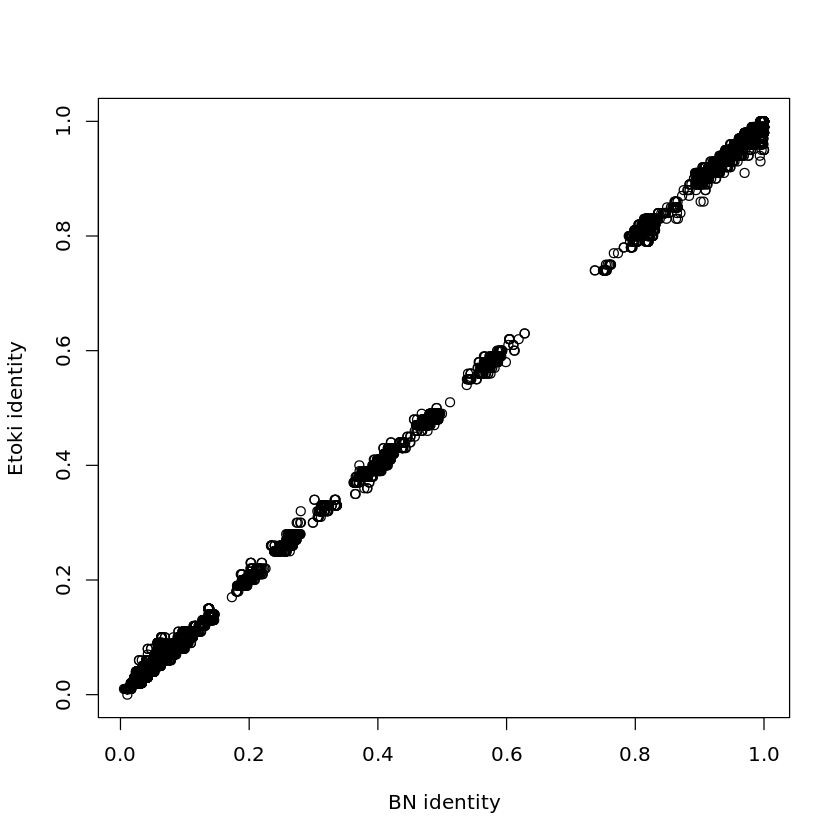

In [30]:
plot(filtered$identity.bn, filtered$identity.etoki, xlab="BN identity", ylab="Etoki identity", col="black")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



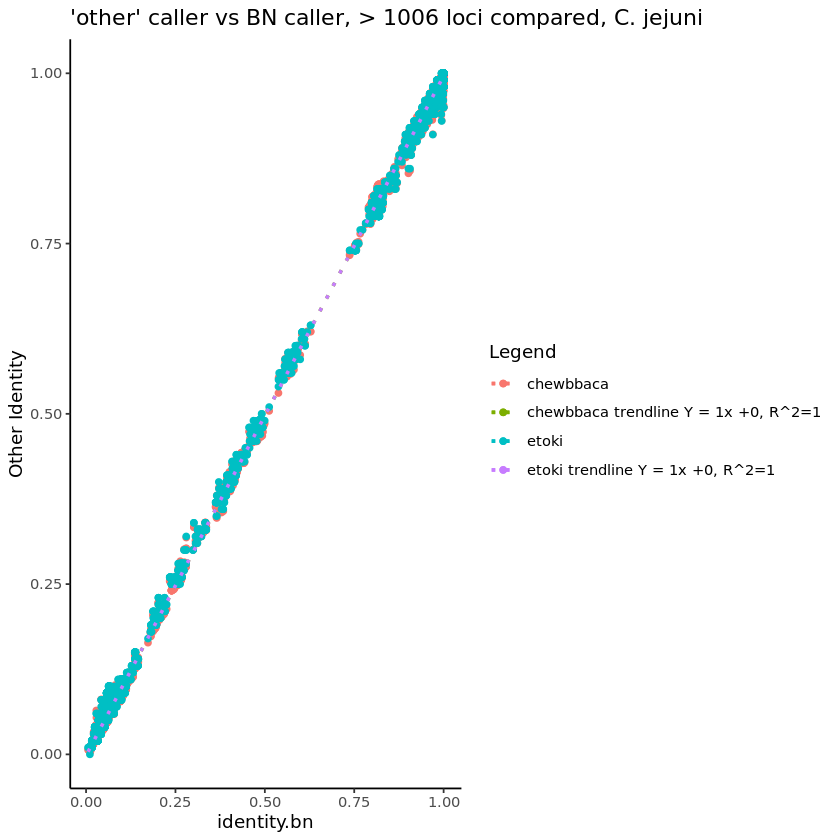

In [31]:
library("ggplot2")
lm_etoki  <- lm(filtered$identity.etoki ~ filtered$identity.bn)
rs_etoki  <- summary(lm_etoki)$r.squared
cc_etoki  <- lm_etoki$coefficients
eqn_etoki <- paste("Y = ", round(cc_etoki[-1],2), "x +", round(cc_etoki[1],2), ", R^2=",round(rs_etoki,2), sep="")

lm_chewbbaca  <- lm(filtered$identity.chewbbaca ~ filtered$identity.bn)
rs_chewbbaca  <- summary(lm_chewbbaca)$r.squared
cc_chewbbaca  <- lm_chewbbaca$coefficients
eqn_chewbbaca <- paste("Y = ", round(cc_chewbbaca[-1],2), "x +", round(cc_chewbbaca[1],2),", R^2=",round(rs_chewbbaca,2), sep="")

ggplot(filtered,n=10000, aes(x=identity.bn)) +
  theme_classic() + 
  ggtitle(
    paste("'other' caller vs BN caller, > ",floor(minLoci)," loci compared, C. jejuni", sep="")
  ) +
  geom_point(aes(y=identity.chewbbaca, color="chewbbaca")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.chewbbaca, color=paste("chewbbaca trendline",eqn_chewbbaca)), method="lm", se=FALSE, linetype="dotted") +
  geom_point(aes(y=identity.etoki, color="etoki")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.chewbbaca, color=paste("etoki trendline",eqn_etoki)), method="lm", se=FALSE, linetype="dotted") +
  labs(y = "Other Identity", color = "Legend") 
